## Exercise: GPU performance for fashion mnist dataset

You need to write code wherever you see your code goes here comment. You are going to do image classification for fashion mnist dataset and then you will benchmark the performance of GPU vs CPU for 1 hidden layer and then for 5 hidden layers. You will eventually fill out this table with your performance benchmark numbers

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

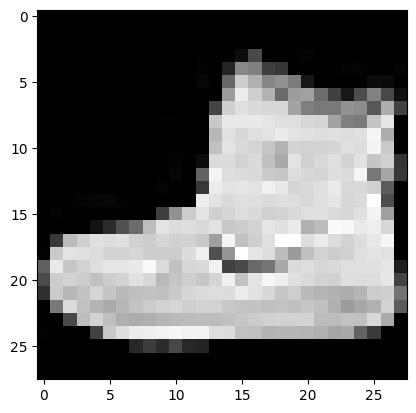

In [6]:
plt.gray()
plt.imshow(train_images[0])

In [7]:
train_labels[0]

9

In [8]:
train_images_scaled = train_images / 255
test_images_scaled = test_images / 255

In [9]:
def get_model(hidden_layers = 1):
    layers = [
        keras.layers.Flatten(input_shape = (28, 28)),   
    ]

    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(200, activation = 'relu'))

    layers.append(keras.layers.Dense(10, activation = 'sigmoid'))

    model = keras.Sequential(layers)
    
    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    
    return model

In [10]:
model = get_model(5)

c:\Users\soura\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,810 (1.22 MB)

 Trainable params: 319,810 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(train_images_scaled, train_labels, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7629 - loss: 0.6472
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8555 - loss: 0.3906
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8746 - loss: 0.3454
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8797 - loss: 0.3254
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8870 - loss: 0.3031


In [13]:
y_prob = model.predict(test_images_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [14]:
y_pred = y_prob.argmax(axis = 1)

In [15]:
cm = tf.math.confusion_matrix(labels = test_labels, predictions = y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[673,   3,   3,  21,   0,   1, 295,   0,   4,   0],
       [  3, 962,   0,  27,   4,   0,   3,   0,   1,   0],
       [ 11,   1, 647,  13, 121,   0, 207,   0,   0,   0],
       [ 18,   5,   4, 892,  27,   0,  50,   0,   4,   0],
       [  0,   1,  60,  45, 772,   0, 122,   0,   0,   0],
       [  0,   0,   0,   1,   0, 981,   0,  12,   4,   2],
       [ 50,   0,  37,  22,  50,   0, 839,   0,   2,   0],
       [  0,   0,   0,   0,   0,  75,   0, 905,   2,  18],
       [  2,   0,   1,   6,   2,   3,  29,   2, 955,   0],
       [  0,   0,   0,   1,   0,  62,   1,  35,   1, 900]])>

Text(95.72222222222221, 0.5, 'Truth')

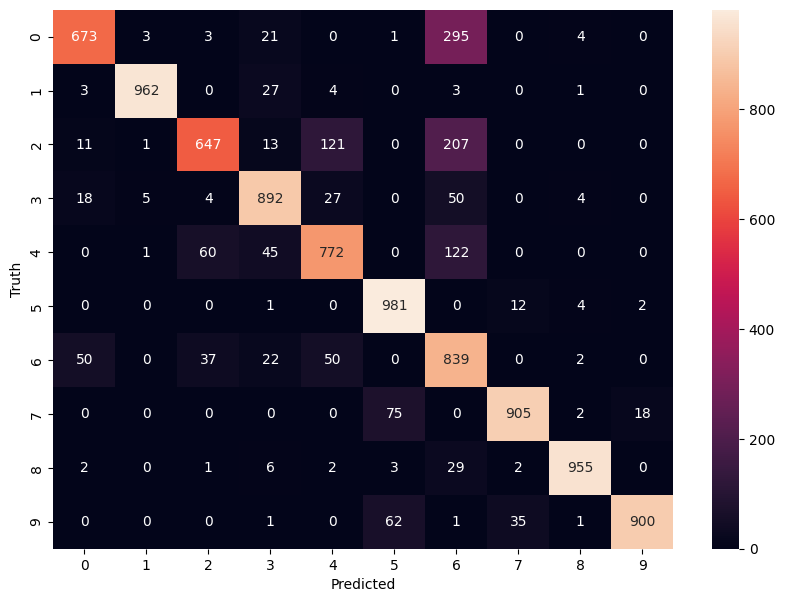

In [16]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

#### 5 Epochs performance comparison for 1 hidden layer

In [18]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model(1)
    model.fit(train_images_scaled, train_labels, epochs = 5)

Epoch 1/5


c:\Users\soura\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7845 - loss: 0.6144
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8644 - loss: 0.3740
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8762 - loss: 0.3394
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8865 - loss: 0.3071
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8908 - loss: 0.2938
16 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### 5 Epocs performance comparison with 5 hidden layers

In [19]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model(5)
    model.fit(train_images_scaled, train_labels, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7621 - loss: 0.6454
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8594 - loss: 0.3888
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8728 - loss: 0.3456
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8835 - loss: 0.3169
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8888 - loss: 0.3026
25.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
